In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for beautiful plots — because beauty honors the community!
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 🌿 Ubuntu Hospital Dataset: "We care because we are together."
data = {
    'Patient_ID': range(1, 101),
    'Age': np.random.randint(1, 90, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Condition': np.random.choice(['Flu', 'Diabetes', 'Hypertension', 'Asthma', 'Healthy'], size=100, p=[0.3, 0.2, 0.2, 0.2, 0.1]),
    'Treatment_Duration_Days': np.random.randint(1, 15, size=100),
    'Satisfaction_Score': np.random.randint(1, 11, size=100),  # 1-10 scale
    'Follow_Up_Needed': np.random.choice([True, False], size=100, p=[0.4, 0.6])
}

# Create DataFrame — our digital village square 🌳
df = pd.DataFrame(data)

print("🏥 Welcome to Ubuntu General Hospital!")
print("Where every patient’s data is honored and cared for.\n")
print(df.head(10))  # Show first 10 villagers (patients)
 
# save to Excel - sharing is caring
excel_filename = 'Ubuntu_hospital_data.xlsx'
# explicitly use openpyxl engine
df.to_excel(excel_filename, index=False, sheet_name='Patients_Records', engine='openpyxl')
print(f"\nData has been saved to {excel_filename} - ready to share with the community!\n")

# create a summary report
summary_data ={
    "metric":["Total Patients",
    "Average Age",
    "Average Satisfaction Score",
    "Patients Needing Follow-up"],          
    "value":[
        len(df),df['Age'].mean(),
        df['Satisfaction_Score'].mean(),
        df['Follow_Up_Needed'].mean() * 100
    ]
}
summary_df=pd.DataFrame(summary_data)

# save summary to excel with multiple sheets 
with pd.ExcelWriter('Ubuntu_Summary.xlsx', engine='openpyxl') as writer:
     summary_df.to_excel(writer, index=False, sheet_name='Summary_Report')

print(f"Summary Report:'Ubuntu_Summary.xlsx'")
print("Includes:Patients Records + Community Health Summary - for leaders,healers and learners")
   




🏥 Welcome to Ubuntu General Hospital!
Where every patient’s data is honored and cared for.

   Patient_ID  Age  Gender     Condition  Treatment_Duration_Days  \
0           1   39  Female      Diabetes                       10   
1           2   38    Male      Diabetes                        2   
2           3   79    Male  Hypertension                        9   
3           4   37  Female      Diabetes                        1   
4           5   12    Male           Flu                       12   
5           6   64  Female  Hypertension                       11   
6           7   71    Male       Healthy                       13   
7           8   30  Female       Healthy                        7   
8           9   44  Female  Hypertension                        3   
9          10   29    Male        Asthma                       10   

   Satisfaction_Score  Follow_Up_Needed  
0                   8             False  
1                   4              True  
2                   2 

=== Community Snapshot ===
Total Patients: 100
Average Age: 42.4 years
Most Common Condition: Flu
Average Satisfaction: 5.75/10

=== Gender Harmony ===
Gender
Female    52
Male      48
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_13144\3434188143.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Condition', palette='viridis')
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


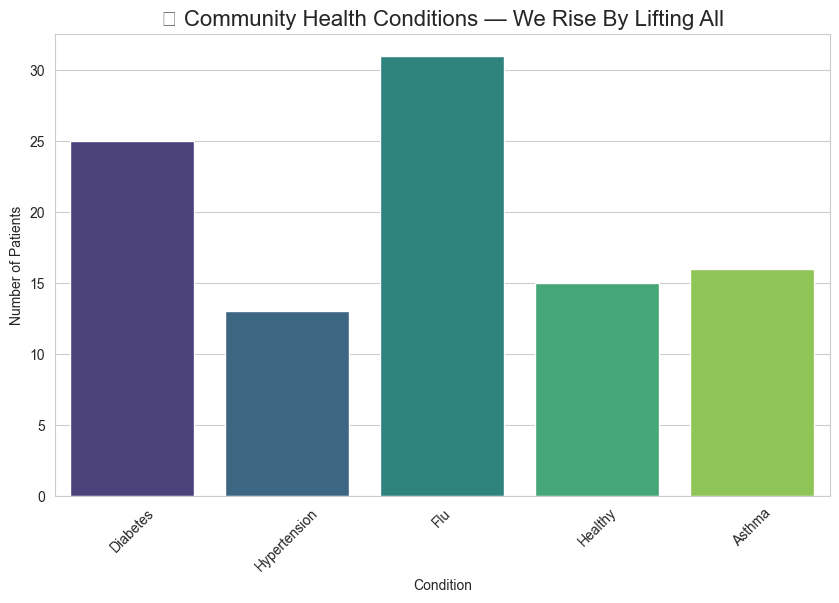

In [11]:
# 🧭 Basic exploration — Who are our patients?
print("=== Community Snapshot ===")
print(f"Total Patients: {len(df)}")
print(f"Average Age: {df['Age'].mean():.1f} years")
print(f"Most Common Condition: {df['Condition'].mode()[0]}")
print(f"Average Satisfaction: {df['Satisfaction_Score'].mean():.2f}/10")

# 📊 Let’s see the gender distribution — balance matters in Ubuntu
print("\n=== Gender Harmony ===")
print(df['Gender'].value_counts())

# 📈 Visualize Conditions — see what the community is facing together
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Condition', palette='viridis')
plt.title("🩺 Community Health Conditions — We Rise By Lifting All", fontsize=16)
plt.xlabel("Condition")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 🤕 Introduce some missing data (for teaching purposes)
df.loc[np.random.choice(df.index, size=10), 'Satisfaction_Score'] = np.nan

print("\n=== Before Healing ===")
print(f"Missing Satisfaction Scores: {df['Satisfaction_Score'].isnull().sum()}")

# 🤝 Ubuntu Clean: Fill missing scores with community average — collective care!
avg_satisfaction = df['Satisfaction_Score'].mean()
df['Satisfaction_Score'].fillna(avg_satisfaction, inplace=True)

print("=== After Ubuntu Healing ===")
print(f"Missing Satisfaction Scores: {df['Satisfaction_Score'].isnull().sum()}")
print(f"Filled with community average: {avg_satisfaction:.2f}")